In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Brain Tumor Data Set.zip' -d '/content/gdrive/MyDrive'

Archive:  /content/gdrive/MyDrive/Brain Tumor Data Set.zip
   creating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/
   creating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: /content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  infl

In [3]:
#!pip install fastai==1.0.58

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 236 kB 8.2 MB/s 
     |████████████████████████████████| 355 kB 60.0 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=3c24ad52c29779c9d057668540ffd588ec855d32e4e0e8b1b57a773940e3021e
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.9
    Uninstalling fastai-2.7.9:
      Successfully uninstalled fastai-2.7.9


In [ ]:
DATA_DIR='/content/gdrive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set'

In [ ]:
os.listdir(f'{DATA_DIR}')

['Brain Tumor', 'Healthy']

In [2]:
!pip install torchvision==0.5.0 #undepreciated version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 7.4 MB/s 
     |████████████████████████████████| 753.4 MB 6.8 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
fastai 2.7.9 requires torch<1.14,>=1.7, but you have torch 1.4.

In [4]:
import numpy as np 
import pandas as pd 
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
import torchvision.models as models

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = ImageDataBunch.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  size=224,bs=24, 
                                  num_workers=0).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')

Classes: 
 ['Brain Tumor', 'Healthy']


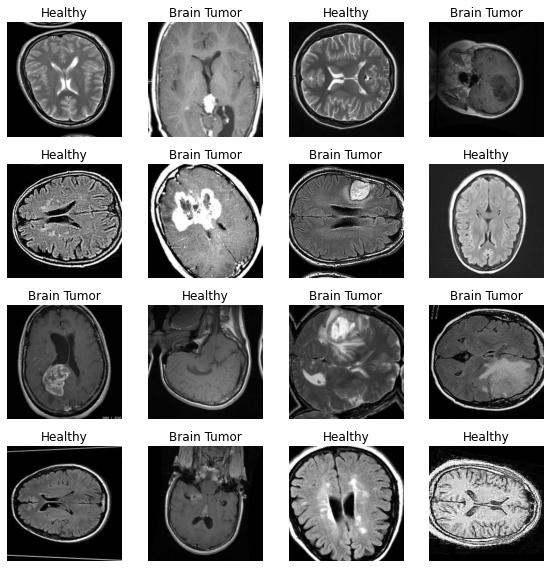

In [ ]:
data.show_batch(rows=4, figsize=(8,8))

In [ ]:
learner = cnn_learner(data, models.vgg16, metrics=[accuracy], callback_fns=ShowGraph,  model_dir="/tmp/model/")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


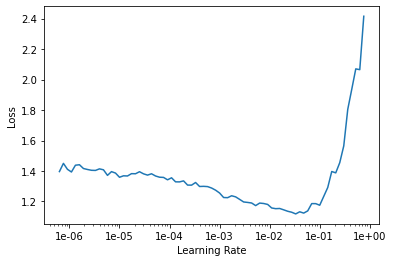

In [ ]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.504624,0.273853,0.892391,01:37
1,0.417076,0.197038,0.928261,01:32
2,0.426236,0.359828,0.877174,01:33
3,0.458271,0.272424,0.891304,01:33
4,0.406294,0.198901,0.926087,01:39
5,0.301510,0.147070,0.952174,01:33
6,0.264510,0.150295,0.940217,01:35
7,0.235471,0.159364,0.930435,01:33
8,0.209125,0.137204,0.945652,01:32
9,0.205506,0.110969,0.965217,01:31


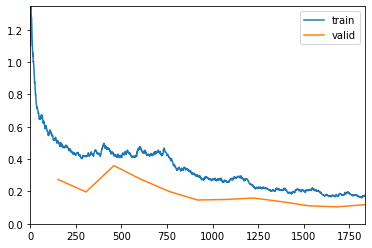

In [ ]:
learner.fit_one_cycle(12, max_lr=slice(1e-02))

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

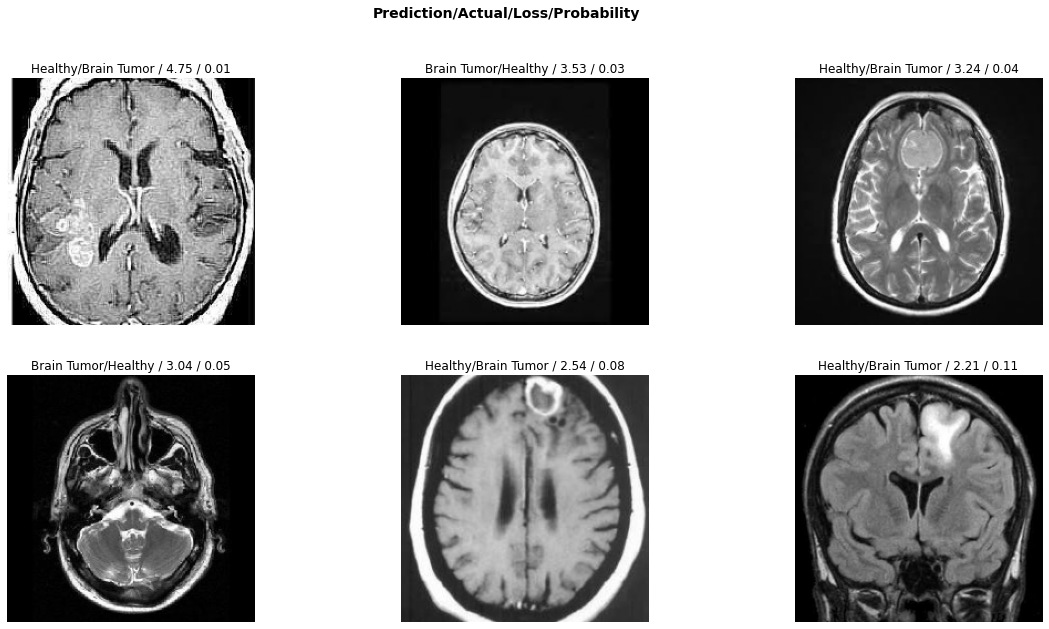

In [ ]:
interp.plot_top_losses(6, figsize=(20,10)) # top 6 images with highest loss

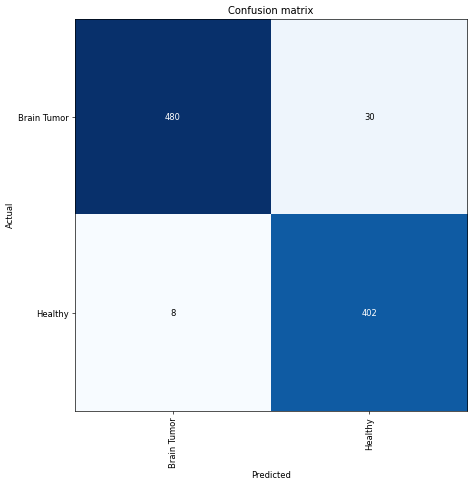

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [ ]:
learner.export('/content/gdrive/MyDrive/DS_Project/BrainTumor_Detection/vgg_16_stage1.pkl')


# Load Model + Prediction on Single Image

In [5]:
m1 = load_learner('/content/gdrive/MyDrive/DS_Project/BrainTumor_Detection/', file='vgg_16_stage1.pkl')

Populating the interactive namespace from numpy and matplotlib


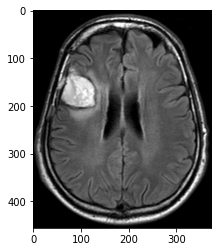

In [22]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/Brain Tumor Data Set/Y7.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
img_pred = open_image('/content/gdrive/MyDrive/Brain Tumor Data Set/Y7.jpg')

# Get the predicted output
preds = m1.predict(img_pred)
#print(preds)

if preds[1] == 0:
  print("Predicted label: {} with Confidence {}".format(preds[0], preds[2][0]))
else:
  print("Predicted label: {} with Confidence {}".format(preds[0], preds[2][1]))

Predicted label: Brain Tumor with Confidence 0.8716166019439697
